In [1]:
# import all libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [2]:
# read raw data

raw_data = pd.read_excel('../bestsellers with categories.xlsx')

In [3]:
#read the preprocessed data

data = pd.read_excel('preprocessdffixed.xlsx')
data.head()

,Unnamed: 0,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,0,10,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0,0.8750,0.197178,0.067308,0.7,1,0.0,0.193075,0,0.914439,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,1,0.8125,0.022949,0.201923,0.2,0,0.0,0.021992,0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,2,0.8750,0.215730,0.134615,0.9,1,0.0,0.211241,0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,3,0.8750,0.243577,0.048077,0.8,0,0.0,0.238507,0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,4,0.9375,0.086875,0.105769,1.0,1,0.0,0.086891,1,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [4]:
data.columns

Index([ 'Unnamed: 0', 'User Rating',      'Review',       'Price',
              'Year',       'Genre',  'Occurences', 'Total Stars',
                   0,            10,
       ...
             'write',        'year',        'york',       'young',
             'zelda',         'zhi',   'zinczenko',        'zone',
               'zoo',       'zusak'],
      dtype='object', length=1392)

In [5]:
new_data = data.drop(['Unnamed: 0'], axis=1)
new_data.head()

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,0,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0.8750,0.197178,0.067308,0.7,1,0.0,0.193075,0,0.914439,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,0.8125,0.022949,0.201923,0.2,0,0.0,0.021992,0,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,0.8750,0.215730,0.134615,0.9,1,0.0,0.211241,0,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,0.8750,0.243577,0.048077,0.8,0,0.0,0.238507,0,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,0.9375,0.086875,0.105769,1.0,1,0.0,0.086891,1,0.000000,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [6]:
print(new_data.columns)
print(new_data.info())

Index(['User Rating',      'Review',       'Price',        'Year',
             'Genre',  'Occurences', 'Total Stars',             0,
                  10,           100,
       ...
             'write',        'year',        'york',       'young',
             'zelda',         'zhi',   'zinczenko',        'zone',
               'zoo',       'zusak'],
      dtype='object', length=1391)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 1391 entries, User Rating to zusak
dtypes: float64(542), int64(849)
memory usage: 3.7 MB
None


In [7]:
new_data.describe()

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,0,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.817003,0.112169,0.119601,0.450432,0.547550,0.063721,0.107363,0.002882,0.011443,0.004541,...,0.002882,0.004588,0.005560,0.005265,0.002882,0.005447,0.005394,0.002882,0.002882,0.002882
std,0.141966,0.124180,0.095142,0.329860,0.498453,0.141970,0.117312,0.053683,0.097284,0.061866,...,0.053683,0.062307,0.073186,0.069562,0.053683,0.071770,0.071114,0.053683,0.053683,0.053683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.039252,0.067308,0.100000,0.000000,0.000000,0.037327,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.812500,0.074063,0.105769,0.400000,1.000000,0.000000,0.070742,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.937500,0.131497,0.144231,0.700000,1.000000,0.111111,0.125072,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Choosing 'k' in Kmeans

In [8]:
# perform PCA
pca = PCA(n_components = 2)
principal_components1 = pca.fit_transform(new_data)
principal_components1

array([[-4.41595656e-01,  2.28909296e-01],
       [ 6.03101186e-01, -2.76051280e-01],
       [-4.89782607e-01,  3.74584287e-01],
       [ 4.90882342e-01,  2.85770059e-01],
       [-4.43265340e-01,  6.01146413e-01],
       [ 5.79716309e-01, -2.89935009e-01],
       [ 6.20675862e-01, -7.68078288e-02],
       [ 5.54913570e-01,  2.65668117e-01],
       [-4.77280976e-01,  3.64107329e-01],
       [ 5.88284871e-01,  3.14935903e-01],
       [-4.97779769e-01, -3.79097329e-01],
       [-4.82080954e-01, -2.44423792e-01],
       [ 4.76633822e-01,  3.28774838e-01],
       [-4.65664495e-01, -3.88165101e-01],
       [-4.42763541e-01,  2.68120333e-01],
       [-4.81468048e-01,  2.00056611e-01],
       [-4.76125586e-01,  1.79807483e-01],
       [-4.24496038e-01,  1.92690013e-01],
       [-4.68116828e-01,  2.09632883e-01],
       [ 5.29703910e-01,  5.55826966e-02],
       [ 4.93522930e-01, -1.27664891e-01],
       [-4.79242988e-01,  8.84753554e-02],
       [ 4.94887279e-01, -8.76849733e-02],
       [-5.

In [9]:
pca_dataset1 = pd.DataFrame(data = principal_components1, columns = ['component1', 'component2'] )

principalComponent1 = pca_dataset1['component1']
principalComponent2 = pca_dataset1['component2']

<Figure size 432x288 with 0 Axes>

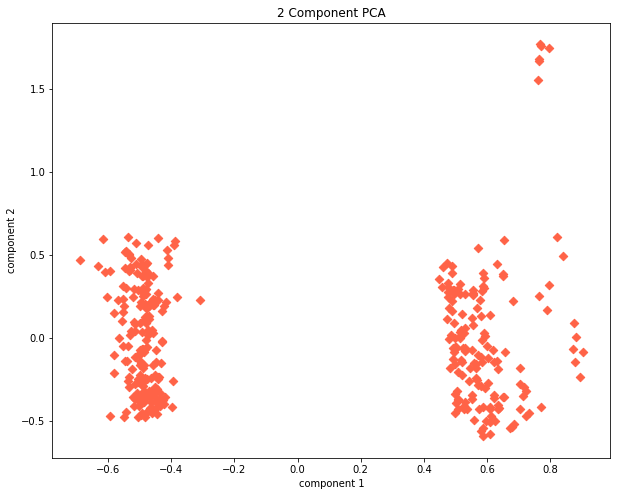

In [10]:
# plot 'component1' vs 'component2'
plt.figure()
plt.figure(figsize=(10,8))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('2 Component PCA')
plt.scatter(pca_dataset1['component1'], pca_dataset1['component2'], c="tomato", marker="D") 
plt.savefig('2_Component_PCA.png')

In [11]:
# Building the clustering model and calculating the values of the distortion and Inertia

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(principal_components1) 
    kmeanModel.fit(principal_components1)     
      
    distortions.append(sum(np.min(cdist(principal_components1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / principal_components1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(principal_components1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / principal_components1.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

# Tabulating and Visualizing the results

1 : 0.6376658498477443
2 : 0.31470630828764434
3 : 0.28213098178199464
4 : 0.1991558924498873
5 : 0.14896544909046003
6 : 0.12815120282569373
7 : 0.1082213250788711
8 : 0.0946816095245679
9 : 0.09093777747684338


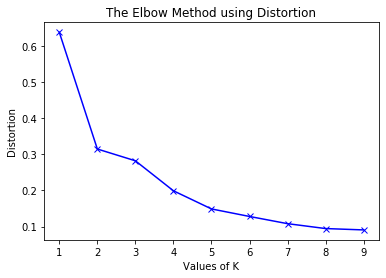

In [12]:
# using the different values of distortion
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
# plot the elbow graph
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 154.40194411741902
2 : 53.72664126380941
3 : 35.44941239206305
4 : 20.105472863598532
5 : 9.974625186140713
6 : 7.601714875519478
7 : 5.428079091688347
8 : 4.344177209585814
9 : 3.805328310414008


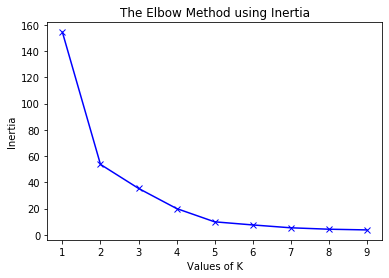

In [13]:
# Using the different values of Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

# Implement Kmeans using the chosen k 

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(principal_components1)
acc = accuracy_score(y_kmeans, kmeans.labels_)
print(f'Accuracy: {acc}')

In [14]:
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(principal_components1)
print(y_kmeans)

[1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 0 1]


In [15]:
kmeans.cluster_centers_

array([[ 0.59252936, -0.00473008],
       [-0.48961636,  0.00390854]])

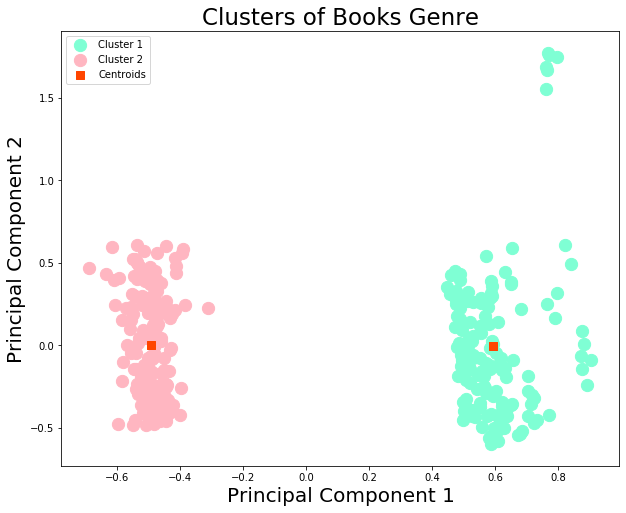

In [16]:
plt.figure(figsize=(10,8))

#plt.scatter(principal_components1[:,0], principal_components1[:,1], c = y_kmeans, cmap = 'rainbow')
plt.scatter(principal_components1[y_kmeans == 0, 0], principal_components1[y_kmeans == 0, 1], s = 150, c = 'aquamarine', label = 'Cluster 1')
plt.scatter(principal_components1[y_kmeans == 1, 0], principal_components1[y_kmeans == 1, 1], s = 150, c = 'lightpink', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'orangered', marker = 's', label = 'Centroids')

plt.title('Clusters of Books Genre',fontsize=23)
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.legend(loc='upper left')
plt.savefig('Clusters_of_genre.png')
plt.show()